# Creating a Configuration Space for a 2D Robot with 2 Arms 

I start by creating a 2D robot with 2 Arms with modifiable height and width. In this model, there are three circular obstacles with modifiable radius and location. The workspace for with the circles and the robot is below.

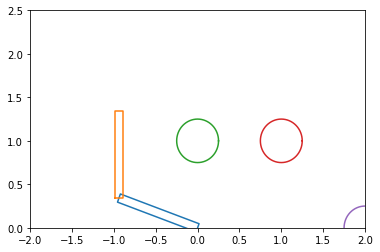

In [1]:
from shapely.geometry import Point, LineString, Polygon
from shapely import affinity
import numpy
from matplotlib.pyplot import figure


import geopandas as gpd
import matplotlib.pyplot as plt

# define locations and parameters
height1 = 1
width1 = .1
height2 = 1
width2 = .1
rad1, locx1, locy1 = .25, 0, 1
rad2, locx2, locy2 = .25, 1, 1
rad3, locx3, locy3 = .25, 2, 0
start_angle = 20

# create items
start_angle = + 90 - start_angle 

poly1 = Polygon( [(-width1/2, 0), (width1/2,0), (width1/2, height1), (-width1/2,height1)])
poly2 = Polygon( [(-width2/2, height1), (width2/2,height1), (width2/2, height2+height1), (-width2/2,height2+height1)])

poly1rot = affinity.rotate(poly1, start_angle, (0, 0))
x, y = poly1rot.exterior.coords.xy
poly2x = numpy.mean([x[2], x[3]])
poly2y = numpy.mean([y[2], y[3]])
poly2rot = Polygon([(-width2/2+poly2x, poly2y), (width2/2+poly2x,poly2y), (width2/2+poly2x, height2+poly2y), (-width2/2+poly2x,height2+poly2y)])
        
        
circle1 = Point(locx1,locy1).buffer(rad1)
circle2 = Point(locx2,locy2).buffer(rad2)
circle3 = Point(locx3,locy3).buffer(rad3)

# plot workspace
plt.plot(*poly1rot.exterior.xy)
plt.plot(*poly2rot.exterior.xy)
plt.plot(*circle1.exterior.xy)
plt.plot(*circle2.exterior.xy)
plt.plot(*circle3.exterior.xy)
plt.title("Workspace)
plt.xlim([-height1-height2, height1+height2])
plt.ylim([0, (height1+height2)*1.25])
plt.show()


The code below creates the configuration space for a 2D robot with a fixed starting angle. The blue space is viable configurations.

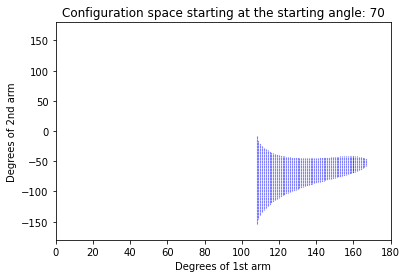

In [4]:
# with starting angle where white is bad configurations
#go from start angle to -90 
for angle1 in range(start_angle, -91, -1):
    poly1rot = affinity.rotate(poly1, angle1, (0, 0))
    if (poly1rot.intersects(circle1) or
            poly1rot.intersects(circle2) or
            poly1rot.intersects(circle3)):
            break
    x, y = poly1rot.exterior.coords.xy
    poly2x = numpy.mean([x[2], x[3]])
    poly2y = numpy.mean([y[2], y[3]])
    for angle2 in range(-180, 181):
        poly2 = Polygon([(-width2/2+poly2x, poly2y), (width2/2+poly2x,poly2y), (width2/2+poly2x, height2+poly2y), (-width2/2+poly2x,height2+poly2y)])
        poly2rot = affinity.rotate(poly2, angle2, (poly2x, poly2y))
        if (poly1rot.intersects(circle1) or
            poly2rot.intersects(circle1) or
            poly2rot.intersects(circle2) or
            poly2rot.intersects(circle3)):
            plt.plot(angle1+90, angle2, "bo", markersize=.1)
            
for angle1 in range(start_angle, 91):
    poly1rot = affinity.rotate(poly1, angle1, (0, 0))
    if (poly1rot.intersects(circle1) or
            poly1rot.intersects(circle2) or
            poly1rot.intersects(circle3)):
            break
    x, y = poly1rot.exterior.coords.xy
    poly2x = numpy.mean([x[2], x[3]])
    poly2y = numpy.mean([y[2], y[3]])
    for angle2 in range(-180, 181):
        poly2 = Polygon([(-width2/2+poly2x, poly2y), (width2/2+poly2x,poly2y), (width2/2+poly2x, height2+poly2y), (-width2/2+poly2x,height2+poly2y)])
        poly2rot = affinity.rotate(poly2, angle2, (poly2x, poly2y))
        if (poly1rot.intersects(circle1) or
            poly2rot.intersects(circle1) or
            poly2rot.intersects(circle2) or
            poly2rot.intersects(circle3)):
            plt.plot(angle1+90, angle2, "bo", markersize=.1)

plt.title("Configuration space starting at the starting angle: " + str(start_angle))
plt.xlabel("Degrees of 1st arm")
plt.ylabel("Degrees of 2nd arm")
plt.xlim([0, 180])
plt.ylim([-180, 180])
plt.show()


The code below creates the configuration space for a 2D robot without a fixed starting angle. The blue space is viable configurations.

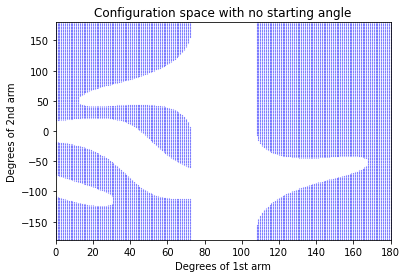

In [7]:
# without starting angle where white is bad configurations
for angle1 in range(-90, 91):
    poly1rot = affinity.rotate(poly1, angle1, (0, 0))
    x, y = poly1rot.exterior.coords.xy
    poly2x = numpy.mean([x[2], x[3]])
    poly2y = numpy.mean([y[2], y[3]])
    for angle2 in range(-180, 181):
        poly2 = Polygon([(-width2/2+poly2x, poly2y), (width2/2+poly2x,poly2y), (width2/2+poly2x, height2+poly2y), (-width2/2+poly2x,height2+poly2y)])
        poly2rot = affinity.rotate(poly2, angle2, (poly2x, poly2y))
        if not (poly1rot.intersects(circle1) or
            poly2rot.intersects(circle1) or
            poly1rot.intersects(circle2) or
            poly2rot.intersects(circle2) or
            poly1rot.intersects(circle3) or
            poly2rot.intersects(circle3)):
            plt.plot(angle1+90, angle2, "bo", markersize=.1)
            
plt.title("Configuration space with no starting angle")
plt.xlabel("Degrees of 1st arm")
plt.ylabel("Degrees of 2nd arm")
plt.xlim([0, 180])
plt.ylim([-180, 180])
plt.show()